In [1]:
#SRCNN PARAMETERS CALCULATION

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation
import keras.backend as K
from keras import optimizers
import numpy as np
import h5py

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model = Sequential([
    Conv2D(64, kernel_size=(9,9), input_shape=(32,32,1), activation ='relu',padding='same'),
    Conv2D(32, kernel_size=(1,1),activation='relu',padding='same'),
    Conv2D(1, kernel_size=(5,5),activation='relu',padding='same'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        5248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 1)         801       
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


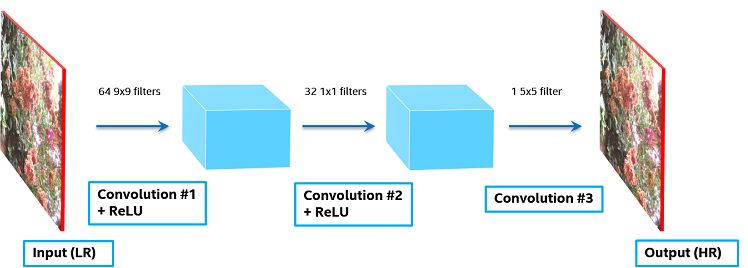

In [4]:
from IPython.display import Image
Image('SRCNN.png')

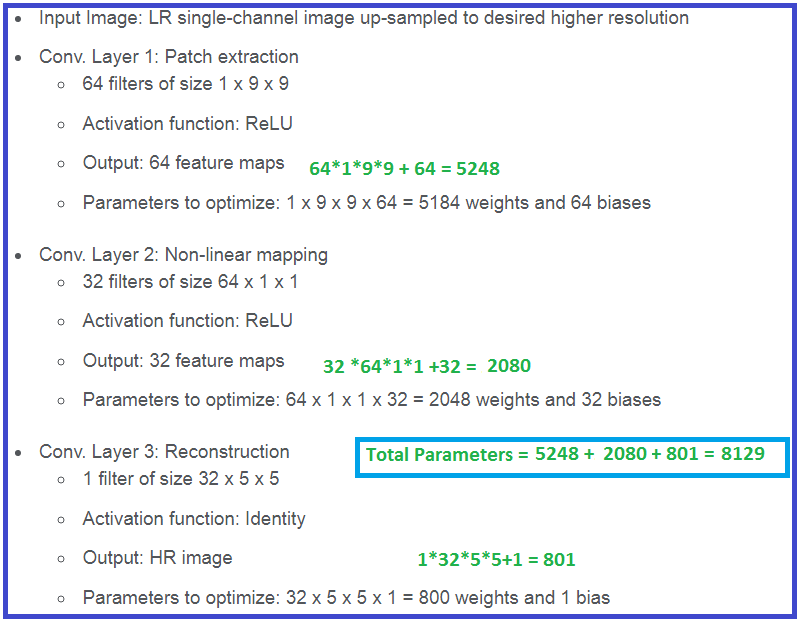

In [5]:
from IPython.display import Image
Image('AC.png')

In [ ]:
f = h5py.File('train.h5','r')
input_ = f.get('data')[:]
target_ = f.get('label')[:]
f.close()

f = h5py.File('test.h5','r')
input_val = f.get('data')[:]
target_val = f.get('label')[:]
f.close()

In [ ]:
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='mean_squared_error')

model.fit(input_,target_,batch_size = 32, epochs = 1,validation_data=(input_val,target_val))
model.save('wazirtrainingscale2epoch10.h5')